In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [3]:
from keras import layers, optimizers, losses, metrics, Model, Sequential, callbacks, datasets

In [8]:
mnist_data = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

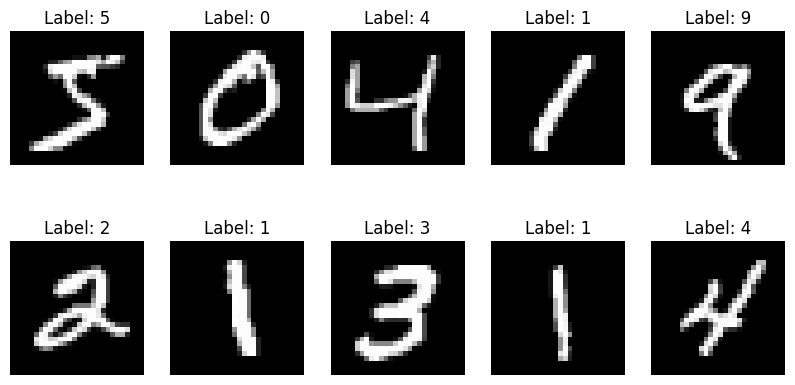

In [11]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")
plt.show()


Create the autoencoder class

In [12]:
class AutoEncoder(Model):
    def __init__(self):
        super().__init__()
        self.encoder = Sequential([
            layers.Dense(128, activation='relu', input_shape=(784,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu')
        ])

        self.latent = layers.Dense(32, activation='relu')

        self.decoder = Sequential([
            layers.Dense(32, activation='relu', input_shape=(32,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(784, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        latent = self.latent(encoded)
        decoded = self.decoder(latent)
        return decoded

Create the early stopping function

In [13]:
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [14]:
model = AutoEncoder()
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.MeanAbsoluteError(), metrics=['accuracy'])
model.summary()

c:\Users\Hrishikesh\Desktop\da_assignment_3\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "auto_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 784)            │       112,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,440 (872.81 KB)

 Trainable params: 223,440 (872.81 KB)

 Non-trainable params: 0 (0.00 B)